Recomendar películas a los usuarios basándose en películas similares, por lo que se debe encontrar la similitud de puntuación entre esa película y el resto de películas, se ordenarán según el score y devolverá una lista de Python con 5 valores, cada uno siendo el string del nombre de las películas con mayor puntaje, en orden descendente. Debe ser deployado como una función adicional de la API anterior y debe llamarse get_recommendation(titulo: str).

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

In [29]:
rating_1= pd.read_csv('Ratings/1.csv')
rating_2= pd.read_csv('Ratings/2.csv')
rating_3= pd.read_csv('Ratings/3.csv')
rating_4= pd.read_csv('Ratings/4.csv')
rating_5= pd.read_csv('Ratings/5.csv')
rating_6= pd.read_csv('Ratings/6.csv')
rating_7= pd.read_csv('Ratings/7.csv')
rating_8= pd.read_csv('Ratings/8.csv')

In [30]:
df_rating = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,rating_7,rating_8])

In [4]:
df_rating.head()

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [36]:
df = pd.read_csv('dataset_plataformas_final.csv')

Busco combinar los dos dataframes, el de las calificaciones propias de cada usuario y el de las plataformas. Antes elimino las columnas que siento que no tienen relevancia para mi modelo

In [38]:
df.drop(columns = ['show_id', 'cast', 'director', 'country', 'description', 'release_year', 'date_added'], inplace =True) 
df.head()

,id,type,title,rating,listed_in,duration_int,duration_type,score
0,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6
1,ds2,movie,ernest saves christmas,pg,comedy,91,min,3.5
2,ds3,movie,ice age: a mammoth christmas,g,"animation, comedy, family",23,min,3.6
3,ds4,movie,the queen family singalong,pg,musical,41,min,3.5
4,ds5,tv show,the beatles: get back,g,"docuseries, historical, music",1,season,3.5


In [39]:
df_modelo = pd.merge(df , df_rating, left_on='id',right_on='movieId')

In [40]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11024289 entries, 0 to 11024288
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   id             object 
 1   type           object 
 2   title          object 
 3   rating_x       object 
 4   listed_in      object 
 5   duration_int   int64  
 6   duration_type  object 
 7   score          float64
 8   userId         int64  
 9   rating_y       float64
 10  timestamp      int64  
 11  movieId        object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.1+ GB


In [41]:
df_modelo.head()

,id,type,title,rating_x,listed_in,duration_int,duration_type,score,userId,rating_y,timestamp,movieId
0,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,101,4.0,850689925,ds1
1,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,251,2.0,1055006120,ds1
2,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,400,3.0,850385998,ds1
3,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,1572,3.5,1470335824,ds1
4,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,1995,2.0,849057602,ds1


In [42]:
reader = Reader()

In [43]:
df_rating.columns


Index(['userId', 'rating', 'timestamp', 'movieId'], dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_rating['movieId'] = encoder.fit_transform(df_rating['movieId'])

In [45]:
N_filas = 100000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(df_rating[['userId', 'rating', 'movieId']][:N_filas], reader)

In [46]:
# Separamos nuestros datos

trainset, testset = train_test_split(data, test_size=.25)

In [47]:
# Usaremos un modelo de Singular Value Decomposition

model = SVD()

In [48]:
# Entrenamos el modelo

model.fit(trainset)

In [49]:
# Predecimos

predictions = model.test(testset)

In [50]:
predictions[1]

Prediction(uid=543, iid=4.0, r_ui=1460.0, est=5, details={'was_impossible': False})

In [51]:
# Hacemos una predicción al azar para usuario y película

model.predict(1328945,28)

Prediction(uid=1328945, iid=28, r_ui=None, est=5, details={'was_impossible': False})

In [52]:
# Tomaremos un usuario para hacerle una recomendación

usuario = 153
rating = 4   # Tomamos películas a las que haya calificado con 4 o 5 estrellas
df_user = df_rating[(df_rating['userId'] == usuario) & (df_rating['rating'] >= rating)]
df_user = df_user.reset_index(drop=True)
df_user['title'] = df['title'].loc[df_user.movieId].values
df_user

,userId,rating,timestamp,movieId,title
0,153,4.0,1088941749,8949,black's game
1,153,4.5,1088940856,7277,back for good
2,153,4.0,1088940402,14416,open your eyes
3,153,4.0,1088940489,11002,die another day (4k uhd)
4,153,4.5,1088941735,17783,happy jail
5,153,4.0,1088941731,5800,iceberg slim: portrait of a pimp
6,153,4.5,1088941067,16757,bennett's war
7,153,4.0,1088940493,15945,forged in fire
8,153,5.0,1088941739,14570,tattoo redo
9,153,4.5,1088941715,20203,30 minutes or less


In [53]:
df_rating[df_rating['userId'] == 153]

,userId,rating,timestamp,movieId
12976,153,4.0,1088941749,8949
12977,153,4.5,1088940856,7277
12978,153,3.0,1088940872,6645
12979,153,4.0,1088940402,14416
12980,153,3.0,1088940420,1228
...,...,...,...,...
13086,153,4.5,1088940715,1231
13087,153,4.0,1088940862,2792
13088,153,4.5,1088941513,15622
13089,153,3.5,1088941385,12603


In [54]:
movies_ids_df1 = df_rating.userId.values
len(movies_ids_df1)

11024289

In [55]:
recomendaciones_usuario = df.iloc[:11024289].copy()
print(recomendaciones_usuario.shape)
recomendaciones_usuario.head()

(22998, 8)


,id,type,title,rating,listed_in,duration_int,duration_type,score
0,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6
1,ds2,movie,ernest saves christmas,pg,comedy,91,min,3.5
2,ds3,movie,ice age: a mammoth christmas,g,"animation, comedy, family",23,min,3.6
3,ds4,movie,the queen family singalong,pg,musical,41,min,3.5
4,ds5,tv show,the beatles: get back,g,"docuseries, historical, music",1,season,3.5


In [24]:
# Debemos extraer las películas que ya ha visto

usuario_vistas = df_rating[df_rating['userId'] == usuario]
print(usuario_vistas.shape)
usuario_vistas.head()

(115, 4)


,userId,rating,timestamp,movieId
12976,153,4.0,1088941749,8949
12977,153,4.5,1088940856,7277
12978,153,3.0,1088940872,6645
12979,153,4.0,1088940402,14416
12980,153,3.0,1088940420,1228


In [56]:
recomendaciones_usuario.drop(usuario_vistas.movieId, inplace = True)
recomendaciones_usuario = recomendaciones_usuario.reset_index()
recomendaciones_usuario.head()

,index,id,type,title,rating,listed_in,duration_int,duration_type,score
0,0,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6
1,1,ds2,movie,ernest saves christmas,pg,comedy,91,min,3.5
2,2,ds3,movie,ice age: a mammoth christmas,g,"animation, comedy, family",23,min,3.6
3,3,ds4,movie,the queen family singalong,pg,musical,41,min,3.5
4,4,ds5,tv show,the beatles: get back,g,"docuseries, historical, music",1,season,3.5


In [57]:
# Recomendamos

recomendaciones_usuario['Estimate_Score'] = recomendaciones_usuario['id'].apply(lambda x: model.predict(usuario, x).est)

In [59]:
recomendaciones_usuario = recomendaciones_usuario.sort_values('Estimate_Score', ascending=False)
recomendaciones_usuario.head(10)

,index,id,type,title,rating,listed_in,duration_int,duration_type,score,Estimate_Score
0,0,ds1,movie,duck the halls: a mickey mouse christmas special,g,"animation, family",23,min,3.6,5
44,44,ds45,movie,jingle all the way 2,pg,"comedy, family",91,min,3.6,5
3,3,ds4,movie,the queen family singalong,pg,musical,41,min,3.5,5
4,4,ds5,tv show,the beatles: get back,g,"docuseries, historical, music",1,season,3.5,5
5,5,ds6,movie,becoming cousteau,pg-13,"biographical, documentary",94,min,3.6,5
6,6,ds7,tv show,hawkeye,tv-14,"action-adventure, superhero",1,season,3.5,5
7,7,ds8,tv show,port protection alaska,tv-14,"docuseries, reality, survival",2,season,3.6,5
8,8,ds9,tv show,secrets of the zoo: tampa,pg,"animals & nature, docuseries, family",2,season,3.6,5
9,9,ds10,movie,a muppets christmas: letters to santa,g,"comedy, family, musical",45,min,3.6,5
10,10,ds11,movie,adventure thru the walt disney archives,pg,documentary,59,min,3.6,5


Evaluo

In [60]:
from surprise import accuracy

accuracy.rmse(predictions)

RMSE: 13281.8206


13281.820556949262

Optimizo los hiperparámetros

In [63]:
from surprise.model_selection import cross_validate

rmse_test_means = []
factores = [1,2,4,8,16,32,64,128,256]

for factor in factores:
    print(factor)
    model = SVD(n_factors=factor)
    cv = cross_validate(model, data, measures=['RMSE'], cv = 3, verbose=True)
    rmse_test_means.append(np.mean(cv['test_rmse']))

1
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    13347.111113323.636513342.157113337.634910.1029 
Fit time          0.45    0.45    0.46    0.45    0.00    
Test time         0.35    0.19    0.19    0.24    0.07    
2
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    13275.945013366.120513370.638813337.568143.6131 
Fit time          0.44    0.48    0.49    0.47    0.02    
Test time         0.35    0.21    0.20    0.25    0.07    
4
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    13270.032313358.956613383.661813337.550248.7961 
Fit time          0.47    0.59    0.50    0.52    0.05    
Test time         0.34    0.23    0.25    0.28    0.05    
8
Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE 

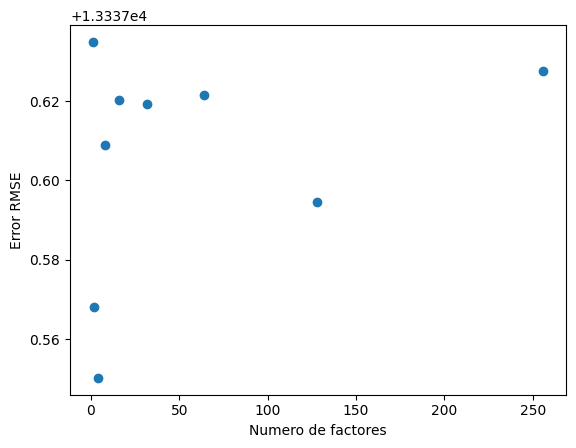

In [66]:
# Ploteamos desempeño según cantidad de factores de SVD

plt.scatter(factores, rmse_test_means)
plt.xlabel('Numero de factores')
plt.ylabel('Error RMSE')
plt.show()

In [67]:
# Nuevamente, no apto para ansiosos

from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [5,50,100],'n_epochs': [5, 10,20], 'lr_all': [0.001, 0.002, 0.005],
              'reg_all': [0.002, 0.02, 0.2]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs = -1)
gs.fit(data)

In [68]:
# Observamos performance del mejor modelo

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

13337.621996716865
{'n_factors': 5, 'n_epochs': 5, 'lr_all': 0.001, 'reg_all': 0.002}


Incorporo datosque no usé todavía

In [ ]:
N_filas = 100000 # Limitamos el dataset a N_filas

data = Dataset.load_from_df(df_rating[['userId', 'rating', 'movieId']][N_filas:N_filas + N_filas], reader)